# K-means clustering

### Part I: Demo of concepts

We're first going to learn what exactly the 'k' and the 'means' part of K-means clustering represent. 

#### Step 1: Understand the dataset and the task

I'm starting to plant my flower garden for the spring. I bought seeds for two types of flowers, but upon opening the packets, I dropped all of them and they are now mixed together. Because I have a very particular vision for my garden, and want the shorter yellow flower to form one line and another line of taller purple flowers. Because I also have infinite patience, I measured the width (kernel_width column in 'seeds.csv') and the groove length (kernel_groove_length column in 'seeds.csv') of every single seed I picked back up from the ground. Based on these two measurements alone, can I seperate out the seeds?

#### Step 2: Load the dataset

In [72]:
import numpy as np

data = np.loadtxt('seeds.csv',delimiter=',',skiprows=1)
X = data[:,0:2] # The first column contains kernel_width, the second column contains kernel_groove_length
#Notice that we don't have a 'y'!

#### Step 3: Apply k-means cluster with k = 2

In [73]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2,random_state=0).fit(X)

#### Step 4: Visualize the dataset and the clusters

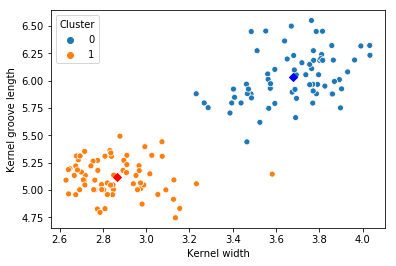

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt 
ax = sns.scatterplot(x=X[:,0],y=X[:,1],hue=model.labels_)
ax.legend(title='Cluster')
ax.plot(model.cluster_centers_[0,0],model.cluster_centers_[0,1], 'Db')
ax.plot(model.cluster_centers_[1,0],model.cluster_centers_[1,1], 'Dr')
ax.set_xlabel('Kernel width')
ax.set_ylabel('Kernel groove length')
plt.show()

#### Step 5: Compare cluster centers to mean of all datapoints

Based on the results, why do you think this is called k-means clustering?

In [47]:
cluster0_center = model.cluster_centers_[0,:]
cluster1_center = model.cluster_centers_[1,:]
cluster0_mean = np.mean(X[model.labels_ ==0], axis=0)
cluster1_mean = np.mean(X[model.labels_ ==1], axis=0)
print('Cluter 0 center: ' + str(cluster0_center))
print('Cluter 0 mean  : ' + str(cluster0_mean))
print('Cluter 1 center: ' + str(cluster1_center))
print('Cluter 1 mean  : ' + str(cluster1_mean))

Cluter 0 center: [3.6787971  6.03330435]
Cluter 0 mean  : [3.6787971  6.03330435]
Cluter 1 center: [2.86402817 5.11678873]
Cluter 1 mean  : [2.86402817 5.11678873]


### K-means clustering on handwriting images

Now we try K-means on much higher dimensional data, and think about why clustering is considered an unsupervised learning.

#### Step 1: Understand the data and the task

'mnist_01.csv' contains MNIST black-and-white images of handwritten digits 0 and 1. Each sample comes from an image, 28 pixels by 28 pixels. We 'flatten' this square image to a flat vector that contains the pixel values (pixel value = 0 means there's no writing/ink in the pixel, going up to value 255). Each row in the spreadsheet corresponds to one such flattened image; the columns correspond to a pixel. Let's see if we can cluster the images and recover the 0's and 1's that the handwritings represent.

#### Step 2: Load the dataet

In [84]:
data = np.loadtxt('mnist_01.csv',delimiter=',')
X = data[:,1:] 
y = data[:,0] # The dataset comes with the 'answers' as to whether the image represents digit 0 or 1.

#### Step 3: Cluster the images

In [85]:
model = KMeans(n_clusters=2,random_state=0).fit(X)

#### Step4: Visualize the cluster centers

Looking back at Step 3 (did we use the 'y' variable?), and the results below, why do you think this is called an 'unsupervised' learning?

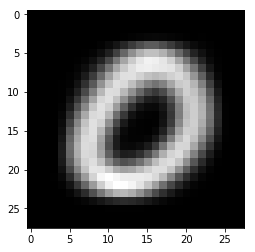

In [86]:
centroid1 = model.cluster_centers_[0,:].reshape((28,28))
plt.gray()
plt.imshow(centroid1)
plt.show()

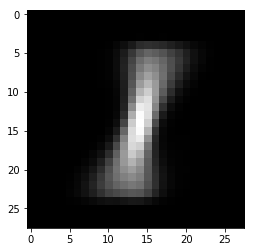

In [87]:
centroid2 = model.cluster_centers_[1,:].reshape((28,28))
plt.gray()
plt.imshow(centroid2)
plt.show()

# Principal Comonent Analysis (PCA)

Here we're going to learn about PCA, which comes from a family of powerful unsupervised learning methods called dimensionality reduction.

#### Step 1: Understand the data and the task

You saw above that a datapoint may originally be represented using a lot of features (in case of the MNIST image, one image is represented with 28 x 28 = 784 features). The number of features is sometimes referred to as the dimension of the dataset, and many real-world datasets are high dimensional (think about the number of features collected on you in a single hospital admission). You also saw above that although the images are represented with 784 pixels/features, there were fundamentially two underlying patterns/groupings of the images. Here we're going to explore if we can reduce the dimension of the dataset, i.e., represent each data point with just 2 features or 'faux'/pseudo-pixels, while still preserving those underlying patterns.


#### Step 2: Get the top 2 principal components

In [94]:
from sklearn.decomposition import PCA

print('Dimension of original dataset: ' 
      + str(X.shape[0]) + ' datapoints, ' + str(X.shape[1]) + ' features')
model = PCA(n_components=2).fit(X)

Dimension of original dataset: 2115 datapoints, 784 features


#### Step 3: Project the data to 2D space using the two principal components

How many 'faux' pixels are we using to represent each image with PCA? <br>
What do you notice about the 'clumps' of datapoints (which represent images) in this 2D space? <br>
Can you guess which handwritten digit (0 or 1) an image belonging to one of the clumps would represent?

Dimension of the dataset after reduction with PCA: 2115 datapoints, 2 features


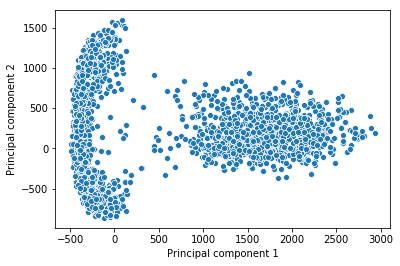

In [95]:
X_project = np.dot(X, model.components_.T)

print('Dimension of the dataset after reduction with PCA: ' 
      + str(X_project.shape[0]) + ' datapoints, ' + str(X_project.shape[1]) + ' features')

ax = sns.scatterplot(x=X_project[:,0],y=X_project[:,1])
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
plt.show()

#### Step 4: Now we 'cheat' and label each datapoint to its true digit label

Was your guess correct from step 3? In hindsight, what does the shape of each 'clump' represent?

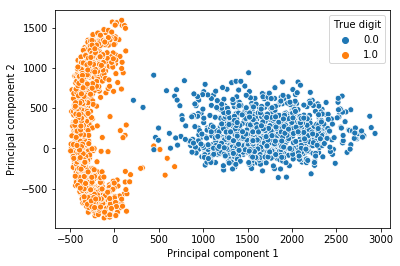

In [90]:
X_project = np.dot(X, model.components_.T)
ax = sns.scatterplot(x=X_project[:,0],y=X_project[:,1],hue=y)
ax.legend(title='True digit')
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
plt.show()